# Import Key Libraries

In [290]:
import requests
from bs4 import BeautifulSoup
from random import choice
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import ssl
import time, os
import json
import random
import pickle
import pandas as pd
import urllib.request
import urllib.parse
import urllib.error
from urllib.request import Request, urlopen
import ast
from collections import defaultdict 
from lxml import html

# Functions to Rotate Randomly Generated User Agents and Proxies

In [21]:
# create functions, will only be relevant when accessing home details - need to use selenium to get initial links

In [22]:
def get_proxy():
    '''
    Returns a random proxy from a sslproxies.org
    '''
    url = "https://www.sslproxies.org/"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html5lib")
    return {'https': 
     choice(list(map(lambda x:x[0]+':'+x[1],
        list(zip(map(lambda x:x.text, soup.findAll('td')[::8]), 
                 map(lambda x:x.text, soup.findAll('td')[1::8]))))))}

In [23]:
def proxy_agent_request(request_type, url, **kwargs):
    '''
    A function to request a url through a random user agent and a proxy, the function test the proxy
    '''
    while 1:
        try:
            proxy = get_proxy()
            ua = UserAgent()
            user_agent = {'User-agent': ua.random}
            print("Using proxy: {}".format(proxy))
            print("Using user agent: {}".format(user_agent))
            r = requests.request(request_type, url, proxies=proxy, headers=user_agent, timeout=5, **kwargs)
            break
        except:
            pass
    return r 

In [24]:
def working_user_agent():
    '''
    returns a user agent at random
    '''
    ua = UserAgent()
    user_agent = {'User-agent': ua.random}
    return user_agent

In [25]:
working_user_agent()

{'User-agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}

In [26]:
def proxies():
    '''
    Returns a working random proxy
    '''
    while 1:
        try:
            proxy = get_proxy()
            url = "https://www.sslproxies.org/"
            r = requests.get(url, proxies=proxy, timeout=5)
            break
        except:
            pass
    working = proxy
    prepped_proxy = list(working.values())[0]
    prepped_proxy = {'http': prepped_proxy}
    return prepped_proxy 

In [96]:
# testing working_proxy

proxies()

{'http': '51.158.186.242:8811'}

In [29]:
# testing functions

r = proxy_agent_request('get', "https://www.youtube.com/")

Using proxy: {'https': '165.227.163.91:3128'}
Using user agent: {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
Using proxy: {'https': ' FR:122'}
Using user agent: {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2866.71 Safari/537.36'}
Using proxy: {'https': '212.129.34.163:3128'}
Using user agent: {'User-agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}


In [30]:
r.status_code

200

In [31]:
# For ignoring SSL certificate errors

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Setup Selenium .get specifications

In [10]:
# Setup chromedriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [11]:
chromedriver = "/Program Files/Google/Chrome/Application/chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# Grab URLs for all properties listed in Vermont from homepage

In [12]:
# Store initial homepage for single family homes ion Vermont

url = "https://www.zillow.com/vt/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22vermont%22%2C%22mapBounds%22%3A%7B%22west%22%3A-77.06023564843753%2C%22east%22%3A-67.84270635156253%2C%22south%22%3A40.62302590438021%2C%22north%22%3A46.97341636694772%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A58%2C%22regionType%22%3A2%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22price%22%3A%7B%22min%22%3A0%7D%2C%22mp%22%3A%7B%22min%22%3A0%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A7%7D"

In [13]:
# Access url

driver = webdriver.Chrome(chromedriver)
driver.get(url)

In [14]:
soup = BeautifulSoup(driver.page_source,'html.parser')

In [15]:
# Locating links

soup.findAll('div', {'class' : 'list-card-info'})

[<div class="list-card-info"><a class="list-card-link list-card-link-top-margin" href="https://www.zillow.com/homedetails/23-Bushey-Ln-Westford-VT-05494/220873891_zpid/" tabindex="0"><address class="list-card-addr">23 Bushey Ln, Westford, VT 05494</address></a><div class="list-card-footer"></div><div class="list-card-heading"><div class="list-card-price">$399,900</div><ul class="list-card-details"><li class="">3<abbr class="list-card-label"> <!-- -->bds</abbr>,</li><li class="">2<abbr class="list-card-label"> <!-- -->ba</abbr>,</li><li class="">1,693<abbr class="list-card-label"> <!-- -->sqft</abbr></li><li class="list-card-statusText">-<abbr class="list-card-label"> <!-- -->Active</abbr></li></ul></div></div>,
 <div class="list-card-info"><a class="list-card-link list-card-link-top-margin" href="https://www.zillow.com/homedetails/770-Page-Hill-Road-Holland-VT-05830/2093704924_zpid/" tabindex="0"><address class="list-card-addr">770 Page Hill Road, Holland, VT 05830</address></a><div cl

In [16]:
# Looping through all links and placing in a list

home_links = []

for div in soup.find_all('div', {'class' : 'list-card-info'}):
    for link in div.find_all('a'):
        home_links.append(link.get("href"))

In [17]:
home_links

['https://www.zillow.com/homedetails/106-Newton-Ln-Fairlee-VT-05045/115801008_zpid/',
 'https://www.zillow.com/homedetails/2811-Gregg-Hill-Rd-Waterbury-Center-VT-05677/75471073_zpid/',
 'https://www.zillow.com/homedetails/404-Ridgefield-Rd-Shelburne-VT-05482/247016017_zpid/',
 'https://www.zillow.com/homedetails/78-Gates-Rd-S-Mount-Holly-VT-05730/115789746_zpid/',
 'https://www.zillow.com/homedetails/225-Pleasant-St-Chester-VT-05143/115813941_zpid/',
 'https://www.zillow.com/homedetails/39-Brook-Ln-Shelburne-VT-05482/220864247_zpid/',
 'https://www.zillow.com/homedetails/23-Bushey-Ln-Westford-VT-05494/220873891_zpid/',
 'https://www.zillow.com/homedetails/1838-Brown-Schoolhouse-Rd-Reading-VT-05062/2089629606_zpid/',
 'https://www.zillow.com/homedetails/1711-Abbott-Hill-Rd-West-Burke-VT-05871/115794751_zpid/',
 'https://www.zillow.com/homedetails/1866-Robert-Young-Rd-Starksboro-VT-05487/81624195_zpid/',
 'https://www.zillow.com/homedetails/12-Ely-Rd-Fairlee-VT-05045/75447285_zpid/',
 'h

In [18]:
# Locate links to all pages

In [19]:
# On each page - selects all possible buttons to be clicked for page navigation

all_links = []

for div in soup.find_all('div', {'class' : 'search-pagination'}):
    for link in div.find_all('a'):
        all_links.append(link)
        print(link)

<a class="StyledButton-c11n-8-12-0__wpcbcc-0 bNdNgP PaginationButton-c11n-8-12-0__si2hz6-0 bTrxAR" disabled="" href="/homes/for_sale/house_type/" rel="prev" tabindex="-1" title="Previous page"><svg aria-hidden="true" class="Icon-c11n-8-12-0__sc-13llmml-0 hqZXMi IconChevronLeft-c11n-8-12-0__qv0fwu-0 cdJCvY" focusable="false" role="img" viewbox="0 0 32 32"><title>Chevron Left</title><path d="M29.41 8.59a2 2 0 00-2.83 0L16 19.17 5.41 8.59a2 2 0 00-2.83 2.83l12 12a2 2 0 002.82 0l12-12a2 2 0 00.01-2.83z" stroke="none"></path></svg></a>
<a aria-pressed="true" class="StyledButton-c11n-8-12-0__wpcbcc-0 bNdNgP PaginationButton-c11n-8-12-0__si2hz6-0 bTrxAR" disabled="" href="/homes/for_sale/house_type/" tabindex="-1" title="Page 1, current page">1</a>
<a class="StyledButton-c11n-8-12-0__wpcbcc-0 KOEUR PaginationButton-c11n-8-12-0__si2hz6-0 bTrxAR" href="/homes/for_sale/house_type/2_p/" title="Page 2">2</a>
<a class="StyledButton-c11n-8-12-0__wpcbcc-0 KOEUR PaginationButton-c11n-8-12-0__si2hz6-0 

In [20]:
# Locate the last link, which represents the next page

all_links[-1].get('href')

'/homes/for_sale/house_type/2_p/'

In [21]:
# Rather than scraping the link from each page, since the links are in a predicatable format - let's create all links for 2-20

In [22]:
def url_creator(page):
    '''
    A function to add page number to the existing page
    '''
    return "https://www.zillow.com//homes/for_sale/house_type/{}_p/".format(page)    

In [23]:
# Create a list of all pages

page_links = []

for i in range(2,21):
    page_links.append(url_creator(i))

In [ ]:
# Loop through each page and add each page to a soup object

for i in page_links:
    driver.get(i)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    for div in soup.find_all('div', {'class' : 'list-card-info'}):
        for link in div.find_all('a'):
            home_links.append(link.get("href"))
    time.sleep(15+5*random.random())

In [49]:
# Need to re-run.....only got 120 this time! Should be 800!

len(home_links)

120

In [27]:
home_links

['https://www.zillow.com/homedetails/106-Newton-Ln-Fairlee-VT-05045/115801008_zpid/',
 'https://www.zillow.com/homedetails/2811-Gregg-Hill-Rd-Waterbury-Center-VT-05677/75471073_zpid/',
 'https://www.zillow.com/homedetails/404-Ridgefield-Rd-Shelburne-VT-05482/247016017_zpid/',
 'https://www.zillow.com/homedetails/78-Gates-Rd-S-Mount-Holly-VT-05730/115789746_zpid/',
 'https://www.zillow.com/homedetails/225-Pleasant-St-Chester-VT-05143/115813941_zpid/',
 'https://www.zillow.com/homedetails/39-Brook-Ln-Shelburne-VT-05482/220864247_zpid/',
 'https://www.zillow.com/homedetails/23-Bushey-Ln-Westford-VT-05494/220873891_zpid/',
 'https://www.zillow.com/homedetails/1838-Brown-Schoolhouse-Rd-Reading-VT-05062/2089629606_zpid/',
 'https://www.zillow.com/homedetails/1711-Abbott-Hill-Rd-West-Burke-VT-05871/115794751_zpid/',
 'https://www.zillow.com/homedetails/1866-Robert-Young-Rd-Starksboro-VT-05487/81624195_zpid/',
 'https://www.zillow.com/homedetails/12-Ely-Rd-Fairlee-VT-05045/75447285_zpid/',
 'h

In [33]:
# save list of links to a csv for storage

df= pd.DataFrame(home_links)
df.to_csv('home_links.csv')

In [4]:
pwd

'C:\\Users\\Andrew\\Documents\\Metis\\Reg_Scraping'

In [9]:
# open saved csv of links from local

df = pd.read_csv('home_links.csv')

In [10]:
df.head()

,Unnamed: 0,0
0,0,https://www.zillow.com/homedetails/106-Newton-...
1,1,https://www.zillow.com/homedetails/2811-Gregg-...
2,2,https://www.zillow.com/homedetails/404-Ridgefi...
3,3,https://www.zillow.com/homedetails/78-Gates-Rd...
4,4,https://www.zillow.com/homedetails/225-Pleasan...


In [18]:
# Convert csv back to a list for easier manipulation

home_links = list(df['0'])

In [20]:
# Investigating home_links

home_links

['https://www.zillow.com/homedetails/106-Newton-Ln-Fairlee-VT-05045/115801008_zpid/',
 'https://www.zillow.com/homedetails/2811-Gregg-Hill-Rd-Waterbury-Center-VT-05677/75471073_zpid/',
 'https://www.zillow.com/homedetails/404-Ridgefield-Rd-Shelburne-VT-05482/247016017_zpid/',
 'https://www.zillow.com/homedetails/78-Gates-Rd-S-Mount-Holly-VT-05730/115789746_zpid/',
 'https://www.zillow.com/homedetails/225-Pleasant-St-Chester-VT-05143/115813941_zpid/',
 'https://www.zillow.com/homedetails/39-Brook-Ln-Shelburne-VT-05482/220864247_zpid/',
 'https://www.zillow.com/homedetails/23-Bushey-Ln-Westford-VT-05494/220873891_zpid/',
 'https://www.zillow.com/homedetails/1838-Brown-Schoolhouse-Rd-Reading-VT-05062/2089629606_zpid/',
 'https://www.zillow.com/homedetails/1711-Abbott-Hill-Rd-West-Burke-VT-05871/115794751_zpid/',
 'https://www.zillow.com/homedetails/1866-Robert-Young-Rd-Starksboro-VT-05487/81624195_zpid/',
 'https://www.zillow.com/homedetails/12-Ely-Rd-Fairlee-VT-05045/75447285_zpid/',
 'h

# Utilize list of links to scrape details from each individual home

In [36]:
# Testing first on one property

url = "https://www.zillow.com/homedetails/506-N-Hill-Rd-Stowe-VT-05672/227730817_zpid/"

In [37]:
req = Request(url, headers= working_user_agent())

In [38]:
webpage = urlopen(req).read()

In [39]:
# Place webpage within beautiful soup object

soup = BeautifulSoup(webpage, "html5lib")

<!DOCTYPE html>
<html class="no-js zsg-theme-modernized null" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#"><head>
<script>(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
        (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
        m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
        })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');</script><script>window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;
    ga("create","UA-21174015-56", "auto", {allowLinker:true});
    ga('set','dimension1', 'fd5cde632653432291601a822dd07aab');
    ga('set','dimension191', '');
    /* Queue for Global UA Object */
    (function(w,n){w[n]=w[n]||function(){(w[n].q=w[n].q||[]).push(a
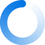

In [504]:
soup

In [505]:
# Locate jsons with key information

In [506]:
soup.findAll('script',attrs={'type': 'application/ld+json'})[2]

<script type="application/ld+json">{"@type":"SingleFamilyResidence","@context":"http://schema.org","name":"506 N Hill Rd Unit 3b, Stowe, VT 05672","floorSize":{"@type":"QuantitativeValue","@context":"http://schema.org","value":"3,114"},"numberOfRooms":3,"address":{"@type":"PostalAddress","@context":"http://schema.org","streetAddress":"506 N Hill Rd UNIT 3B","addressLocality":"Stowe","addressRegion":"VT","postalCode":"05672"},"geo":{"@type":"GeoCoordinates","@context":"http://schema.org","latitude":44.430619,"longitude":-72.702333},"url":"/homedetails/506-N-Hill-Rd-UNIT-3B-Stowe-VT-05672/2076567133_zpid/"}</script>

In [507]:
ex1 = jsonString = str(soup.find_all('script', type='application/ld+json')[0].text)

In [508]:
ex2 = jsonString = str(soup.find_all('script', type='application/ld+json')[1].text)

In [509]:
# convert json to dict

_dict1 = ast.literal_eval(ex1)
_dict2 = ast.literal_eval(ex2)

In [539]:
# Create a dictionary to store all subdicts in

all_properties = {}

In [510]:
# Initiate dictionary

property_info = {}
property_info['name'] = {}
property_info['price'] = {}
property_info['street_address'] = {}
property_info['town'] = {}
property_info['postal_code'] = {}
property_info['bedrooms'] = {}
property_info['bathrooms'] = {}
property_info['sf'] = {}
property_info['latitude'] = {}
property_info['longitude'] = {}
property_info['link'] = {}
property_info['year_built'] = {}
property_info['lot_size'] = {}
property_info['view_description'] = {}
property_info['on_waterfront'] = {}
property_info['house_style'] = {}
property_info['new_construction'] = {}

In [511]:
# Assign values to dictionary

property_info['name']= _dict1['name']
property_info['price'] = _dict2['offers']['price']
property_info['street_address'] = _dict1['address']['streetAddress']
property_info['town'] = _dict1['address']['addressLocality']
property_info['postal_code'] = _dict1['address']['postalCode']
property_info['bedrooms'] = _dict1['numberOfRooms']
property_info['sf'] = _dict1['floorSize']['value']
property_info['latitude'] = _dict1['geo']['latitude']
property_info['longitude'] = _dict1['geo']['longitude']
property_info['link'] = _dict1['url']

In [513]:
# Locating the number of bathrooms

soup.find_all("span",class_ = "ds-bed-bath-living-area")[1].text

'16 ba'

In [514]:
property_info['bathrooms'] = soup.find_all("span",class_ = "ds-bed-bath-living-area")[1].text

In [515]:
# Locating year built
property_info['year_built'] = soup.find(class_="ds-home-fact-list").find_all("span")[3].text

In [516]:
# Locating Lot Size
property_info['lot_size'] = soup.find(class_="ds-home-fact-list").find_all("span")[11].text

In [532]:
# Locating remaining features

In [533]:
for element in soup.find_all(class_="Text-c11n-8-18-0__aiai24-0 foiYRz"):
    print(element.text)

Residential
1991
Baseboard, Hot Water, Zoned, Programmable Thermostat, Radiant Floor, Gas - LP/Bottle
Central Air, Zoned
Brick/Pavers, Circular Driveway, Gated, Heated, Paved, Auto Open, Direct Access, Finished, Heated Garage, Attached
2,982,553 Acres
$694
Bedrooms: 11
Bathrooms: 16
Full bathrooms: 6
3/4 bathrooms: 6
1/2 bathrooms: 3
1/4 bathrooms: 1
Basement: Daylight,Finished,Insulated,Partial,Interior Entry
Flooring: Hardwood, Slate/Stone, Tile
Heating features: Baseboard, Hot Water, Zoned, Programmable Thermostat, Radiant Floor, Gas - LP/Bottle
Cooling features: Central Air, Zoned
Appliances included: Dishwasher, Dryer, Range Hood, Microwave, Gas Range, Refrigerator, Washer
Laundry features: Laundry - 1st Floor
Total structure area: 18,055
Total interior livable area: 17,218 sqft
Finished area above ground: 12,780
Fireplace features: Gas, Fireplaces - 3+
Virtual tour: View virtual tour
Total spaces: 0
Parking features: Brick/Pavers, Circular Driveway, Gated, Heated, Paved, Auto Ope

In [534]:
# Pulling out key stats not in json info

In [535]:
# Start with "On Waterfront"

for element in soup.find_all(class_="Text-c11n-8-18-0__aiai24-0 foiYRz"):
    try:
        if "On waterfront:" in element.text:
            string = element.text
            split_string = string.split(":", 1)
            property_info['on_waterfront'] = split_string[1]
            break
    except:
        pass

In [536]:
# View Description

for element in soup.find_all(class_="Text-c11n-8-18-0__aiai24-0 foiYRz"):
    try:
        if "View description:" in element.text:
            string = element.text
            split_string = string.split(":", 1)
            property_info['view_description'] = split_string[1]
            break
    except:
        pass

In [537]:
# Architectural style

for element in soup.find_all(class_="Text-c11n-8-18-0__aiai24-0 foiYRz"):
    try:
        if "Architectural style:" in element.text:
            string = element.text
            split_string = string.split(":", 1)
            property_info['house_style'] = split_string[1]
            break
    except:
        pass

In [538]:
# New Construction

for element in soup.find_all(class_="Text-c11n-8-18-0__aiai24-0 foiYRz"):
    try:
        if "New construction:" in element.text:
            string = element.text
            split_string = string.split(":", 1)
            property_info['new_construction'] = split_string[1]
            break
    except:
        pass